In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
toyota=pd.read_csv("/content/toyota.csv")

In [22]:
toyota.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [23]:
toyota.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,125,50.4,1.3


In [24]:
toyota.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [32]:
# ---------------------------------------------
# NETTOYAGE COMPLET DES DONNÉES - VERSION SIMPLE
# ---------------------------------------------

import pandas as pd
import numpy as np

# 1. Charger le fichier CSV
df = pd.read_csv("/content/toyota.csv")   # changer le nom du fichier

# 2. Aperçu rapide
print("Aperçu des données :")
print(df.head())
print("\nInfos :")
print(df.info())

# 3. Vérifier les valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())

# ----- OPTIONS DE NETTOYAGE -----

# 4. Supprimer les lignes entièrement vides
df.dropna(how="all", inplace=True)

# 5. Remplir les valeurs manquantes
# Remplir les valeurs numériques par la moyenne
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Remplir les valeurs catégorielles par la modalité la plus fréquente
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# 6. Supprimer les doublons
df.drop_duplicates(inplace=True)

# 7. Normalisation / Standardisation des colonnes numériques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 8. Encodage des catégories (One-Hot Encoding)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 9. Nettoyage des colonnes texte
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].str.strip().str.lower().str.replace(r"[^a-zA-Z0-9 ]", "", regex=True)

# 10. Matrice de corrélation
corr_matrix = df.corr(numeric_only=True)
print("\nMatrice de corrélation :")
print(corr_matrix)

# 11. Sauvegarder le fichier nettoyé
df.to_csv("data_clean.csv", index=False)

print("\nNettoyage terminé. Le fichier nettoyé est enregistré sous 'data_clean.csv'.")

Aperçu des données :
   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0

Infos :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           67

DROITES DE REGRESSION LINEAIRE ET LOGISTIQUE

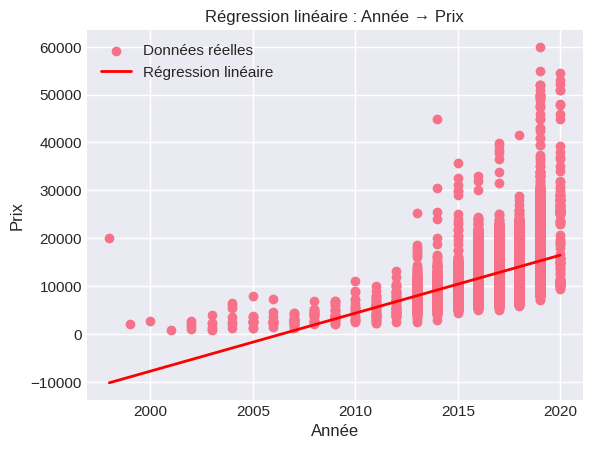

In [33]:
from sklearn.linear_model import LinearRegression

# Variables
X = toyota[['year']]        # variable explicative
y = toyota['price']         # variable cible

# Modèle de régression linéaire
lin_model = LinearRegression()
lin_model.fit(X, y)

# Préparation de la courbe
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred = lin_model.predict(X_range)

# Tracé
plt.scatter(X, y, label="Données réelles")
plt.plot(X_range, y_pred, color='red', linewidth=2, label="Régression linéaire")
plt.xlabel("Année")
plt.ylabel("Prix")
plt.title("Régression linéaire : Année → Prix")
plt.legend()
plt.grid(True)
plt.show()


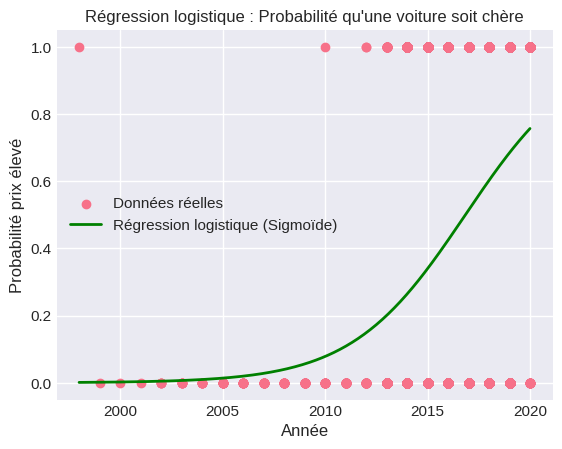

In [28]:
from sklearn.linear_model import LogisticRegression

# Création d'une variable binaire prix élevé / prix bas
median_price = toyota['price'].median()
toyota['high_price'] = (toyota['price'] >= median_price).astype(int)

# Variables
X = toyota[['year']]
y = toyota['high_price']

# Modèle
log_model = LogisticRegression()
log_model.fit(X, y)

# Courbe sigmoïde
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = log_model.predict_proba(X_range)[:, 1]

# Tracé
plt.scatter(X, y, label="Données réelles")
plt.plot(X_range, y_prob, color='green', linewidth=2, label="Régression logistique (Sigmoïde)")
plt.xlabel("Année")
plt.ylabel("Probabilité prix élevé")
plt.title("Régression logistique : Probabilité qu'une voiture soit chère")
plt.legend()
plt.grid(True)
plt.show()


Matrice de corrélation :
                year     price   mileage       tax       mpg  engineSize  \
year        1.000000  0.420959 -0.727749  0.283455 -0.020607   -0.045567   
price       0.420959  1.000000 -0.297936  0.214498 -0.039910    0.727592   
mileage    -0.727749 -0.297936  1.000000 -0.205285  0.044889    0.182615   
tax         0.283455  0.214498 -0.205285  1.000000 -0.430292    0.155727   
mpg        -0.020607 -0.039910  0.044889 -0.430292  1.000000   -0.106868   
engineSize -0.045567  0.727592  0.182615  0.155727 -0.106868    1.000000   
high_price  0.295392  0.701442 -0.189057  0.138707  0.014256    0.637649   

            high_price  
year          0.295392  
price         0.701442  
mileage      -0.189057  
tax           0.138707  
mpg           0.014256  
engineSize    0.637649  
high_price    1.000000  


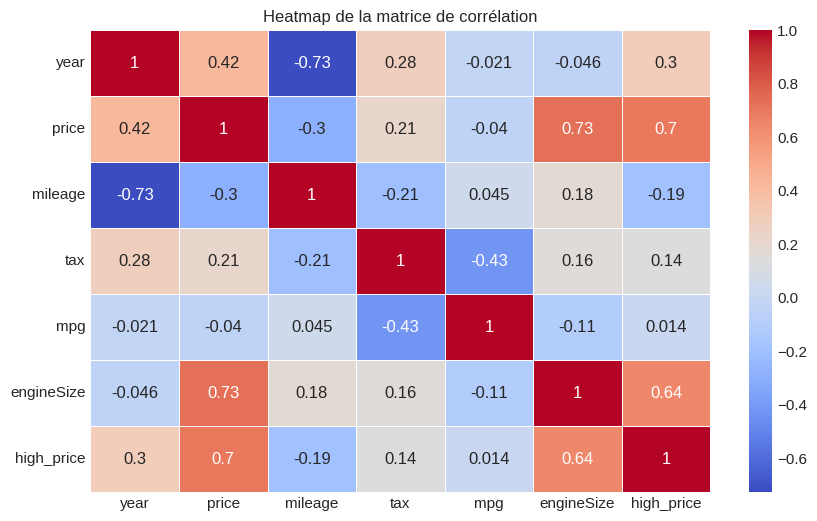

In [30]:
# Matrice de corrélation
# Sélectionner uniquement les colonnes numériques pour le calcul de la corrélation
numeric_toyota = toyota.select_dtypes(include=np.number)
corr = numeric_toyota.corr()

# Affichage de la matrice
print("Matrice de corrélation :")
print(corr)

# Heatmap de corrélation
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap de la matrice de corrélation")
plt.show()